In [151]:
import pandas_datareader as pd
import numpy as np
import pandas
import datetime as dt
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
#This class is meant to take in a pandas dataframe that contains historic stock information, analyze it, and return values
class Analysis:
    ticker = ''
    timePeriod = ''
    frame = ''
    start = ''
    today = ''
    def __init__(self, tikr, timePeriod, end_date):
        
        self.timePeriod = timePeriod
        self.ticker = tikr
        
        #Name is set as today due to ease of implementation
        self.today = end_date
        
        self.start = self.today - timePeriod
        self.frame = pd.DataReader(tikr, 'yahoo', self.start, self.today)
    
    
    def averagePrice(self):
        return round(stat.mean(self.frame['Adj Close']), 2)
    
    def standardDeviation(self):
        return round(stat.stdev(self.frame['Adj Close']), 2)
    
    def periodLow(self):
        prices = self.frame['Adj Close']
        
        low = prices[0]
        for price in prices:
            if price < low:
                low = price
                
        return round(low, 2)
    
    def periodHigh(self):
        prices = self.frame['Adj Close']
        
        high = prices[0]
        for price in prices:
            if price > high:
                high = price
                
        return round(high, 2)
    
    def corrWithStock(self, tikr2):
        if self.ticker == tikr2:
            return 1
        frame2 = pd.DataReader(tikr2, 'yahoo', self.start, self.today)
        return (self.frame["Adj Close"].corr(frame2["Adj Close"])) ** 2
    
    def report(self):
        return f"The stock ticker is {self.ticker}\nThe time period is {self.timePeriod.days} days\nThe stock's average price is {self.averagePrice()}\nThe stock's standard deviation is {self.standardDeviation()}\nThe stock's period low was {self.periodLow()}\nThe stock's period high was {self.periodHigh()}"

In [158]:
#Different class for analyzing multiple stocks at one. Utilizes Analysis class for 1-1 comparisons
class MultiAnalysis:
    stocks = ''
    analysis = []
    timePeriod = ''
    

    def __init__ (self, tickers, timePeriod, end_date):
        self.stocks = tickers
        self.timePeriod = timePeriod
        for stock in self.stocks:
            self.analysis.append(Analysis(stock, timePeriod, end_date))
    
    def coCorrelation(self, chart:bool):
        stocks = self.stocks
        n = int(len(stocks))
        array = np.zeros((n, n))
        for x in range(n):
            for y in range (n):
                array[x,y] = self.analysis[x].corrWithStock(stocks[y])
        cFrame = pandas.DataFrame(array, index = stocks, columns = stocks)
        if(not chart):
            return cFrame
        else:
            rowList = []
            i = 1
            tempDict = {}
            for stock in stocks:
                for j in range(i, len(stocks)):
                    tempDict = {"Ticker 1": stock, "Ticker 2": stocks[j], "Corr.": cFrame[stock][j]}
                    rowList.append(tempDict)
                i += 1
            sort = pandas.DataFrame(rowList)
            sort.sort_values(by=["Corr."], ascending=False, inplace=True)
            return sort
    
    
    def multiPlot(self, targetSection):
        for stock in self.analysis:
            stock.frame[targetSection].plot(label=stock.ticker, title=targetSection)
        plt.legend()

          TSLA       GME         F       AMC       PGR
TSLA  1.000000  0.034582  0.470699  0.651230  0.622811
GME   0.034582  1.000000  0.004393  0.010671  0.001845
F     0.470699  0.004393  1.000000  0.840064  0.622698
AMC   0.651230  0.010671  0.840064  1.000000  0.584517
PGR   0.622811  0.001845  0.622698  0.584517  1.000000
 
  Ticker 1 Ticker 2     Corr.
7        F      AMC  0.840064
2     TSLA      AMC  0.651230
3     TSLA      PGR  0.622811
8        F      PGR  0.622698
9      AMC      PGR  0.584517
1     TSLA        F  0.470699
0     TSLA      GME  0.034582
5      GME      AMC  0.010671
4      GME        F  0.004393
6      GME      PGR  0.001845


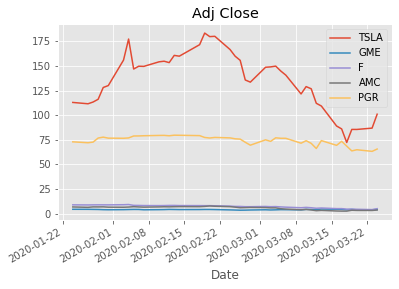

In [159]:
#Using a timedelta of 60 days in order to approximate 2 months change
timeChange = dt.timedelta(days = 60)
end_date = dt.datetime(2020, 3, 24)
today = dt.date.today()

#Begin Programming Assignment 2 information
#tikr = 'TSLA'
#stock = Analysis(tikr, timeChange, today)
#End Assignment 2 information

#Begin Programming Assignment 3 information

#Note about date: utlizing the datetime function "dt.date.today()" hinders the code. 
#If you use "today" as the end date for the analysis, numbers that should be the same will be different (stock a's variace with
#stock b will differ from variance between b and a), and there will be a limit of 3 in the tkrs array

#Another issue is the current version is rather slow and may crash out. Revision of the code is needed to scale up further


tkrs = ['TSLA','GME' ,'F','AMC','PGR']
        
stocks = MultiAnalysis(tkrs, timeChange, end_date)

#printed to include multiple dataframes

print(stocks.coCorrelation(chart = False))
print(" ")
print(stocks.coCorrelation(chart = True))

#In order to clear previous information from previous iterations, run the cell above to clear the chart
stocks.multiPlot("Adj Close")